In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
sns.set_style("whitegrid")

In [27]:
from MyML.helper.plotting import save_fig

In [35]:
folder = "/home/chiroptera/QCThesis/experiments/study kmin/"
filename = "results_kmin_100k.csv"

In [47]:
res = pd.read_csv(folder + filename)
for col in res.columns:
    print col

Unnamed: 0
n_samples
rule
kmin
kmax
t_ensemble
biggest_cluster
type_mat
t_build
n_assocs
max_assoc
t_sl
accuracy
round


In [48]:
res = res[np.logical_not(res.n_samples.isnull())]
res.max_assoc = res.max_assoc.apply(lambda s: int(s.strip('()').split(',')[0]))
res['sparsity'] = res.n_assocs * 1.0 / (res.n_samples ** 2)

In [49]:
by_rule_n = res.groupby(by=["rule","n_samples"])
rule_n_mean = by_rule_n.apply(np.mean)
rule_n_mean = rule_n_mean[['kmin','kmax','t_ensemble','biggest_cluster','t_build','max_assoc','sparsity']]
rule_n_mean = rule_n_mean.reset_index()

In [50]:
rule_n_mean

,rule,n_samples,kmin,kmax,t_ensemble,biggest_cluster,t_build,max_assoc,sparsity
0,2sqrt,500,24,46,0.449143,103.0,0.003593,102.0,0.175640
1,2sqrt,1000,32,64,0.614484,163.0,0.007613,179.0,0.140068
2,2sqrt,5000,72,142,1.653651,244.2,0.193588,553.0,0.064680
3,2sqrt,10000,100,200,3.284222,357.6,0.679371,825.0,0.048116
4,2sqrt,25000,160,318,9.912761,514.6,2.944074,1290.4,0.029989
5,2sqrt,50000,224,448,25.169035,631.6,8.518460,1645.0,0.020584
6,2sqrt,100000,318,634,65.957036,885.8,25.149985,2302.6,0.014636
7,"sk=300,th=30%",500,2,3,0.256407,333.0,0.015492,499.0,0.906096
8,"sk=300,th=30%",1000,4,5,0.333140,654.0,0.036897,722.2,0.569142
9,"sk=300,th=30%",5000,17,22,0.601839,1353.6,0.685861,1352.6,0.211443


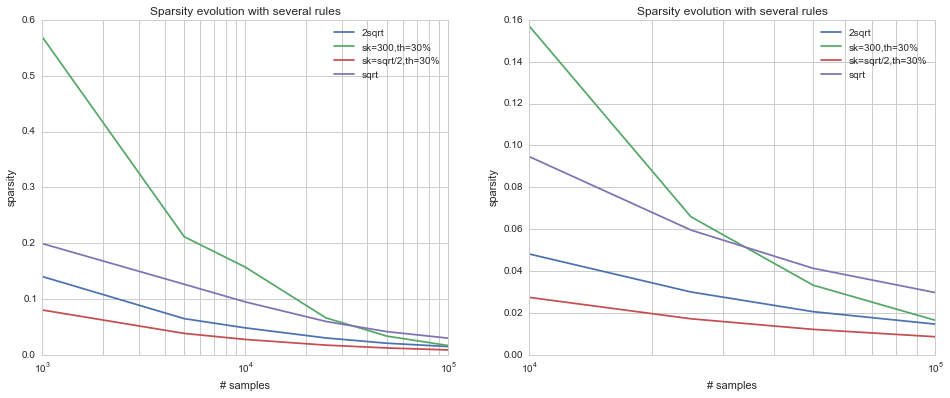

In [51]:
fig1 = plt.figure(figsize=(16,6))

ax = fig1.add_subplot(121)
for key,grp in rule_n_mean.groupby(by="rule"):
    idx = grp.n_samples >= 1e3
    ax.plot(grp.n_samples[idx], grp.sparsity[idx], label=key)

ax.set_xlabel("# samples")
ax.set_ylabel("sparsity")
ax.set_title("Sparsity evolution with several rules")
ax.legend(loc="best")
ax.grid(True, which="both")
ax.set_xscale("log")

    
ax = fig1.add_subplot(122)
for key,grp in rule_n_mean.groupby(by="rule"):
    idx = grp.n_samples >= 1e4
    ax.plot(grp.n_samples[idx], grp.sparsity[idx], label=key)    
    
ax.set_xlabel("# samples")
ax.set_ylabel("sparsity")
ax.set_title("Sparsity evolution with several rules")
ax.legend(loc="best")
ax.grid(True, which="both")
ax.set_xscale("log")

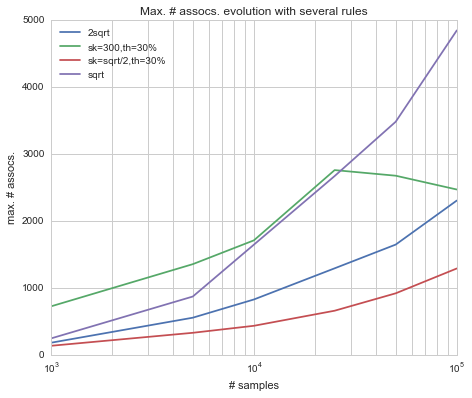

In [52]:
fig2 = plt.figure(figsize=(16,6))

ax = fig2.add_subplot(121)
for key,grp in rule_n_mean.groupby(by="rule"):
    idx = grp.n_samples >= 1e3
    ax.plot(grp.n_samples[idx], grp.max_assoc[idx], label=key)

ax.set_xlabel("# samples")
ax.set_ylabel("max. # assocs.")
ax.set_title("Max. # assocs. evolution with several rules")
ax.legend(loc="best")
ax.grid(True, which="both")
ax.set_xscale("log")

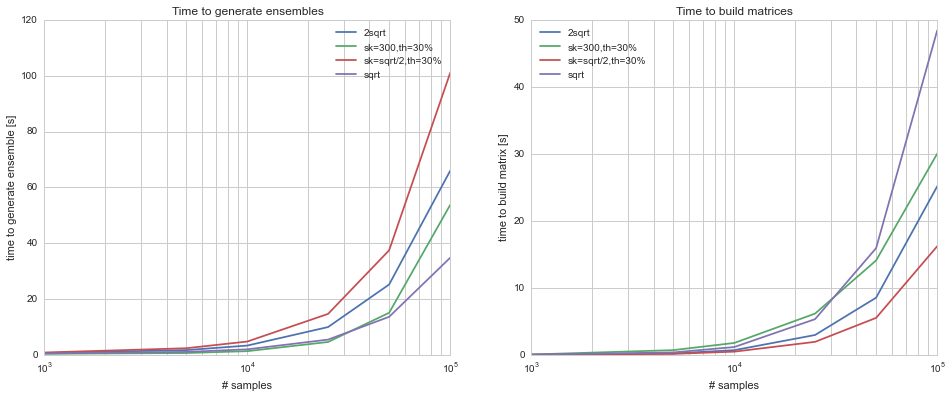

In [53]:
fig3 = plt.figure(figsize=(16,6))

ax = fig3.add_subplot(121)
for key,grp in rule_n_mean.groupby(by="rule"):
    idx = grp.n_samples >= 1e3
    ax.plot(grp.n_samples[idx], grp.t_ensemble[idx], label=key)

ax.set_xlabel("# samples")
ax.set_ylabel("time to generate ensemble [s]")
ax.set_title("Time to generate ensembles")
ax.legend(loc="best")
ax.grid(True, which="both")
ax.set_xscale("log")
#ax.set_yscale("log")
    
ax = fig3.add_subplot(122)
for key,grp in rule_n_mean.groupby(by="rule"):
    idx = grp.n_samples >= 1e3
    ax.plot(grp.n_samples[idx], grp.t_build[idx], label=key)

ax.set_xlabel("# samples")
ax.set_ylabel("time to build matrix [s]")
ax.set_title("Time to build matrices")
ax.legend(loc="best")
ax.grid(True, which="both")
ax.set_xscale("log")

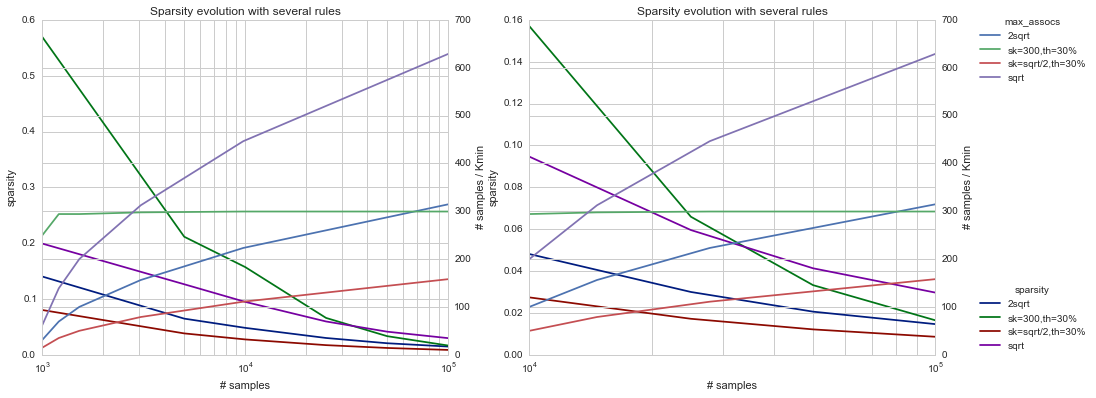

In [54]:
# double y axis example
fig4 = plt.figure(figsize=(16,6))

sns.set_palette(sns.color_palette("dark", 10))
ax = fig4.add_subplot(121)
sns.set_palette(sns.color_palette("deep", 10))
ax_s = ax.twinx()
for key,grp in rule_n_mean.groupby(by="rule"):
    idx = grp.n_samples >= 1e3
    ax.plot(grp.n_samples[idx], grp.sparsity[idx], label=key)
    ax_s.plot(grp.n_samples[idx], grp.n_samples[idx] / grp.kmin[idx], label=key)

ax_s.set_ylabel("# samples / Kmin")
#ax_s.legend(loc=(1.1, 0.8), title="max_assocs")


ax.set_xlabel("# samples")
ax.set_ylabel("sparsity")
ax.set_title("Sparsity evolution with several rules")
#ax.legend(loc=(1.1, 0.0), title="sparsity")
ax.grid(True, which="both")
ax.set_xscale("log")

sns.set_palette(sns.color_palette("dark", 10))
ax = fig4.add_subplot(122)
sns.set_palette(sns.color_palette("deep", 10))
ax_s = ax.twinx()
for key,grp in rule_n_mean.groupby(by="rule"):
    idx = grp.n_samples >= 1e4
    ax.plot(grp.n_samples[idx], grp.sparsity[idx], label=key)    
    ax_s.plot(grp.n_samples[idx], grp.n_samples[idx] / grp.kmin[idx], label=key)

ax_s.set_ylabel("# samples / Kmin")    
ax_s.legend(loc=(1.1, 0.8), title="max_assocs")

ax.set_xlabel("# samples")
ax.set_ylabel("sparsity")
ax.set_title("Sparsity evolution with several rules")
ax.legend(loc=(1.1, 0.0), title="sparsity")
ax.grid(True, which="both")
ax.set_xscale("log")

In [85]:
dark_deep_palette = list()
for (col1,col2) in zip(sns.color_palette("dark", 6),sns.color_palette("deep", 6)):
    dark_deep_palette.append(col1)
    dark_deep_palette.append(col2)

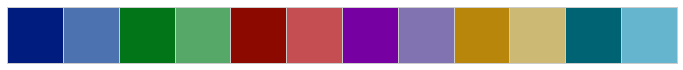

In [86]:
sns.palplot(dark_deep_palette)

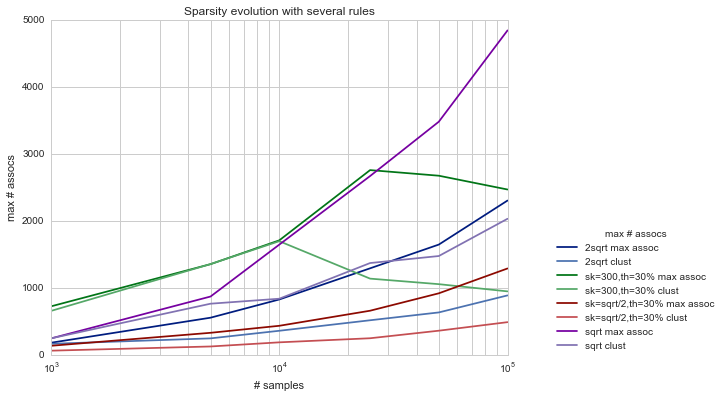

In [91]:
# double y axis example
fig5 = plt.figure(figsize=(18,6))

sns.set_palette(dark_deep_palette, n_colors=len(dark_deep_palette))
ax = fig5.add_subplot(121)
for key,grp in rule_n_mean.groupby(by="rule"):
    idx = grp.n_samples >= 1e3
    ax.plot(grp.n_samples[idx], grp.max_assoc[idx], label=key + " max assoc")
    ax.plot(grp.n_samples[idx], grp.biggest_cluster[idx], label=key + " clust")

ax_s.set_ylabel("biggest cluster")    
ax_s.legend(loc=(1.1, 0.8), title="biggest cluster")

ax.set_xlabel("# samples")
ax.set_ylabel("max # assocs")
ax.set_title("Sparsity evolution with several rules")
ax.legend(loc=(1.1, 0.0), title="max # assocs")
ax.grid(True, which="both")
ax.set_xscale("log")

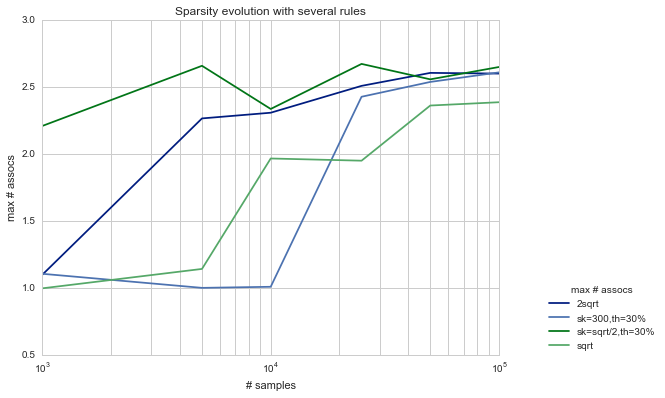

In [88]:
# double y axis example
fig5 = plt.figure(figsize=(18,6))

sns.set_palette(dark_deep_palette)
ax = fig5.add_subplot(121)
for key,grp in rule_n_mean.groupby(by="rule"):
    idx = grp.n_samples >= 1e3
    ax.plot(grp.n_samples[idx], grp.max_assoc[idx] / grp.biggest_cluster[idx], label=key)
ax_s.set_ylabel("biggest cluster")    
ax_s.legend(loc=(1.1, 0.8), title="biggest cluster")

ax.set_xlabel("# samples")
ax.set_ylabel("max # assocs")
ax.set_title("Sparsity evolution with several rules")
ax.legend(loc=(1.1, 0.0), title="max # assocs")
ax.grid(True, which="both")
ax.set_xscale("log")

In [149]:
save_fig(fig1,folder + "sparsity")
save_fig(fig2,folder + "max_assocs")
save_fig(fig3,folder + "times")
save_fig(fig4,folder + "sparsity_kmin")